# `get_border`

## Import packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import skimage

ps.visualization.set_mpl_style()

## Generate image for testing

In [2]:
im2d = np.random.rand(60, 60)
im3d = np.random.rand(60, 60, 60)

## Demonstrate function

### thickness

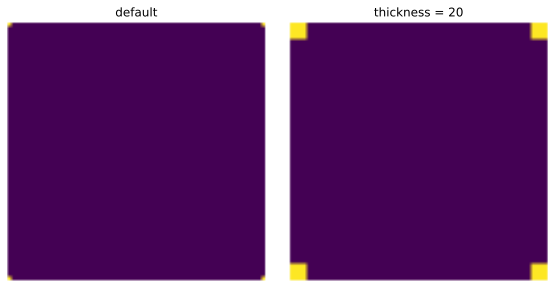

In [3]:
im1 = ps.tools.get_border(shape=im2d.shape)
im2 = ps.tools.get_border(shape=im2d.shape, thickness=4, mode='edges',)

fig, ax = plt.subplots(1, 2, figsize=[8, 4])
ax[0].axis(False)
ax[0].imshow(im1)
ax[0].set_title('default')
ax[1].axis(False)
ax[1].imshow(im2)
ax[1].set_title('thickness = 20');

### mode
The options are 'faces', 'edges', and 'corners'.  

In [4]:
im1 = ps.tools.get_border(shape=im3d.shape, thickness=5, mode='faces')
im2 = ps.tools.get_border(shape=im3d.shape, thickness=5, mode='edges')
im3 = ps.tools.get_border(shape=im3d.shape, thickness=5, mode='corners')

The visualization below using the ``show_3D`` function which gives a very rough idea of how things look in 3D.  It rotates the image using ``scipy.ndimage.rotate``, then does a projection along the z-axis.  The results are a bit fuzzy do to the interpolation when rotating, but you can see how the borders look:

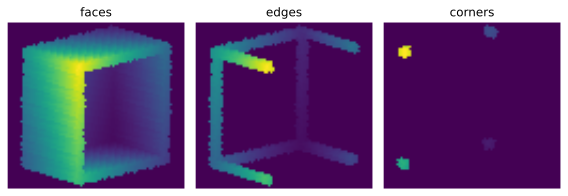

In [5]:
fig, ax = plt.subplots(1, 3, figsize=[8, 4])
ax[0].imshow(ps.visualization.show_3D(~im1[..., 20:]))
ax[0].axis(False)
ax[0].set_title('faces')
ax[1].imshow(ps.visualization.show_3D(~im2[..., 20:]))
ax[1].axis(False)
ax[1].set_title('edges')
ax[2].imshow(ps.visualization.show_3D(~im3[..., 20:]))
ax[2].axis(False)
ax[2].set_title('corners');

For 2D images, the mode of 'faces' and 'edges' both return the same thing.

In [6]:
im1 = ps.tools.get_border(shape=im2d.shape, thickness=10, mode='faces')
im2 = ps.tools.get_border(shape=im2d.shape, thickness=10, mode='edges')
im3 = ps.tools.get_border(shape=im2d.shape, thickness=10, mode='corners')

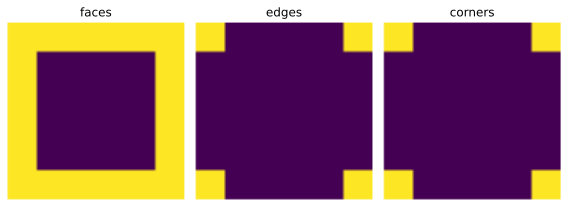

In [7]:
fig, ax = plt.subplots(1, 3, figsize=[8, 4])
ax[0].axis(False)
ax[0].imshow(im1)
ax[0].set_title('faces')
ax[1].axis(False)
ax[1].imshow(im2)
ax[1].set_title('edges')
ax[2].axis(False)
ax[2].imshow(im3)
ax[2].set_title('corners');

### return_indices
Instead of returning a boolean array, the fuction can optionally return indices into ``im`` where the border would be:

In [8]:
inds = ps.tools.get_border(shape=im2d.shape, thickness=5, mode='corners')
im2d[inds] = 0

Text(0.5, 1.0, 'image with zeroed borders')

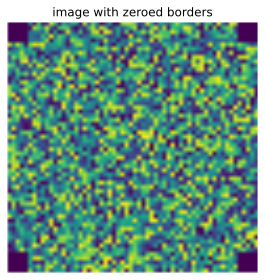

In [9]:
fig, ax = plt.subplots(1, 1, figsize=[4, 4])
ax.axis(False)
ax.imshow(im2d)
ax.set_title('image with zeroed borders')